# Модель DecisionTreeClassifier. Категориальные признаки. SMOTE.

## Загружаем необходимые библиотеки

In [1]:
import pandas as pd # для загрузки данных и применения One-Hot Encoding
import numpy as np # для расчета среднего и стандартного отклонения
import matplotlib.pyplot as plt # для создания графиков
import seaborn as sns # для создания статистических графиков
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # для построения дерева классификации
from sklearn.tree import plot_tree # для отрисовки дерева классификации
from sklearn.model_selection import train_test_split # для разделения данных на тренировочные и тестовые
from sklearn.model_selection import cross_val_score # для кросс валидации
from sklearn.metrics import confusion_matrix # для создания матрицы ошибок
from sklearn.metrics import plot_confusion_matrix # для отрисовки матрицы ошибок

In [2]:
from google.colab import  files
uploaded = files.upload()

Saving DS_PVT_ID_NUMBER_BASE_01_NORM_ML_05_CATEGOR.xlsx to DS_PVT_ID_NUMBER_BASE_01_NORM_ML_05_CATEGOR.xlsx


In [3]:
df = pd.read_excel(open('DS_PVT_ID_NUMBER_BASE_01_NORM_ML_05_CATEGOR.xlsx', 'rb'))

In [4]:
# смотрим первые 5 строк
df.head()

,PVT,Local,Ascites_simple,EVL_simple,PH_dur_simple
0,1,0,0,0,1
1,1,0,1,0,0
2,1,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0


In [5]:
# описывем датафрейм (первая цифра - число строк, вторая - число столбцов)
df.shape

(841, 5)

## Идентифицируем пропущенные значения

In [6]:
# получаем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PVT             841 non-null    int64
 1   Local           841 non-null    int64
 2   Ascites_simple  841 non-null    int64
 3   EVL_simple      841 non-null    int64
 4   PH_dur_simple   841 non-null    int64
dtypes: int64(5)
memory usage: 33.0 KB


In [ ]:
# df = df.drop('ID_Number', axis = 1) # удаляем столбец с идентификационными данными

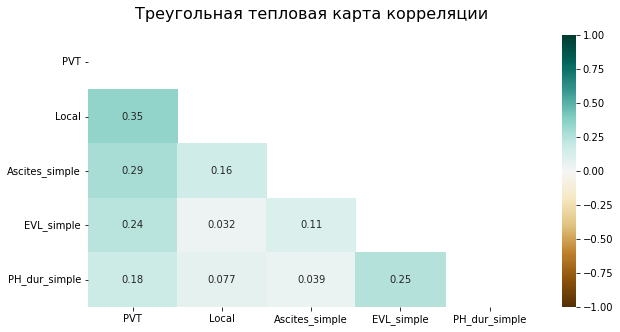

In [7]:
plt.figure(figsize=(10, 5)) 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_)) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':16}, pad=16);

## Разделяем данные на зависимую переменную y и предикторы X

In [8]:
# X (всегда заглавная буква) - предикторы
X = df.drop('PVT', axis=1).copy()
X.head() # смотрим первые 5 строк: целевая переменная PVT отсутствует

,Local,Ascites_simple,EVL_simple,PH_dur_simple
0,0,0,0,1
1,0,1,0,0
2,1,1,0,0
3,0,1,0,0
4,0,1,0,0


In [9]:
# y (строчная букава) - целевая переменная (классификационная)
# создаем копию столбца, в котором содержится целевая переменная
y = df['PVT'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: PVT, dtype: int64

## Строим черновое классификационное дерево

In [11]:
# разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
# балансируем обучающую выборку

In [12]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [15]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [16]:
from collections import Counter
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train))
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train_smote))

Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 530, 1: 100})
Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 530, 1: 530})


In [41]:
# создаем черновое классификационное дерево
df_dt = DecisionTreeClassifier(random_state=42)
df_dt = df_dt.fit(X_train_smote, y_train_smote)

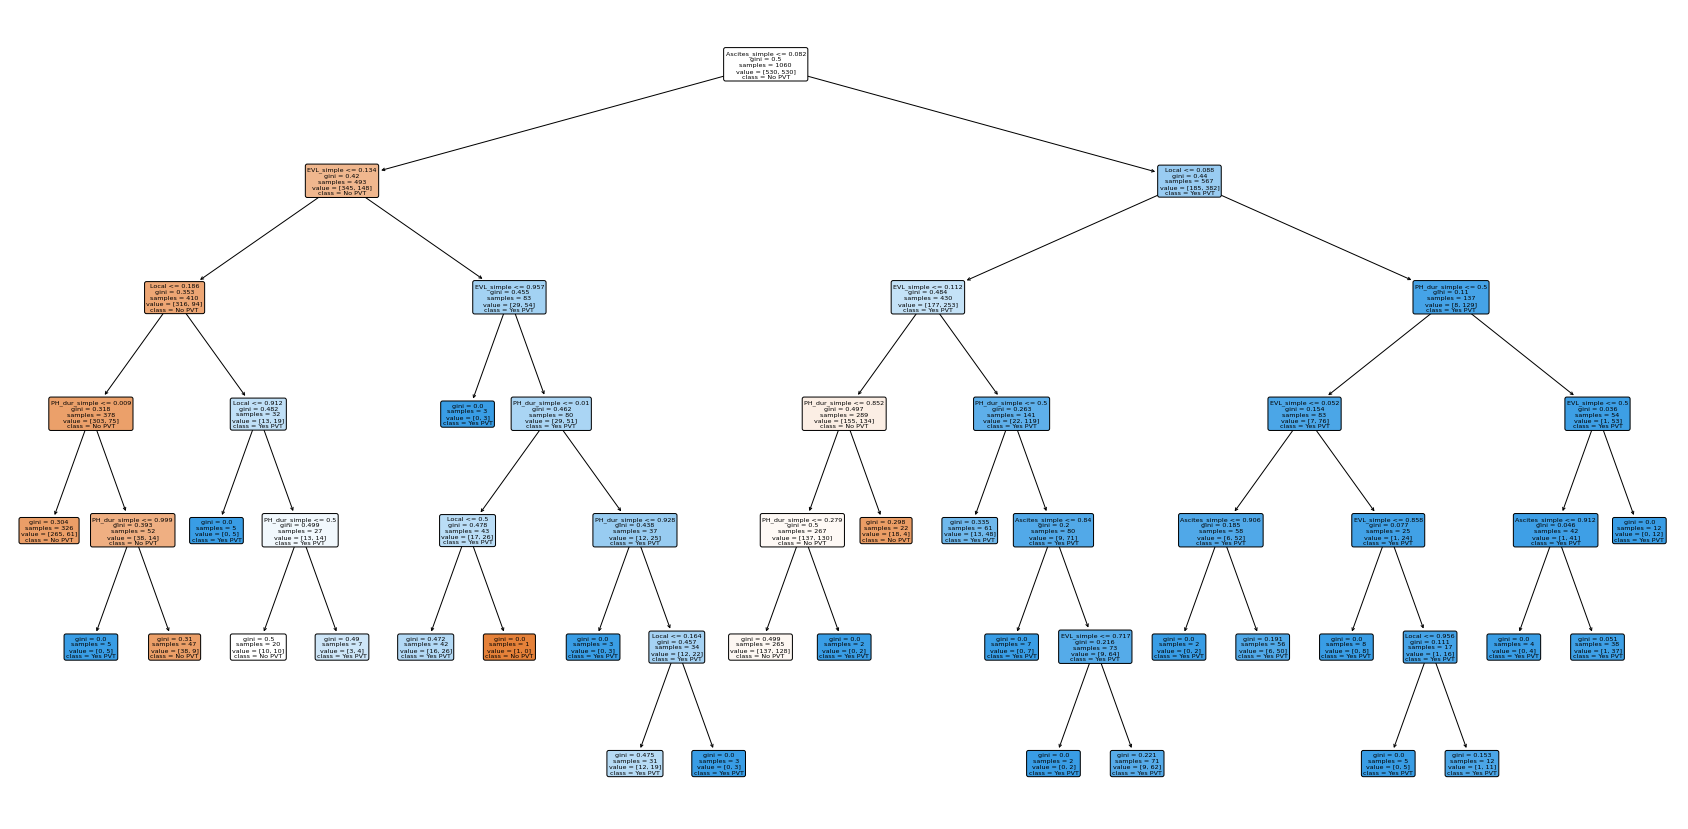

In [42]:
# отрисовываем черновое классификационное дерево
plt.figure(figsize=(30, 15))
plot_tree(df_dt,
          filled=True,
          rounded=True,
          class_names=["No PVT", "Yes PVT"],
          feature_names=X.columns);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


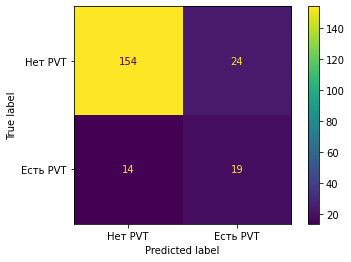

In [63]:
# Проверяем как это дерево работает на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(df_dt, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [44]:
# Интерпретация матрицы ошибок
154 / (154 + 24) # правильно классифицировано 87% пациентов без PVT

0.8651685393258427

In [45]:
# Интерпретация матрицы ошибок
19 / (19 + 14) # правильно классифицировано 57% пациентов с PVT

0.5757575757575758

## Ручная настройка модели



In [74]:
df_dt_1 = DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                       max_depth=None, min_samples_split=2, 
                                       min_samples_leaf=10, min_weight_fraction_leaf=0.0, 
                                       max_features=None, random_state=42, 
                                       max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                       class_weight=None, ccp_alpha=0.0)
    
df_dt_1 = df_dt_1.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


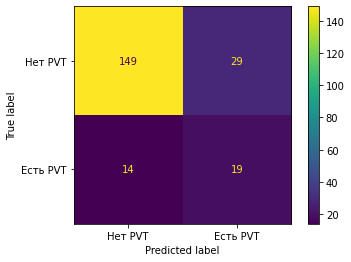

In [75]:
# Проверяем, как это дерево работает после ручной настройки на тестовых данных и строим матрицу ошибок
plot_confusion_matrix(df_dt_1, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [77]:
# Интерпретация матрицы ошибок
149 / (149 + 29) # правильно классифицировано 66% пациентов без PVT (до настройки было 84%)

0.8370786516853933

In [53]:
# Интерпретация матрицы ошибок
28 / (28 + 5) # правильно классифицировано 84% пациентов с PVT (до настройки было 57%) 

0.8484848484848485

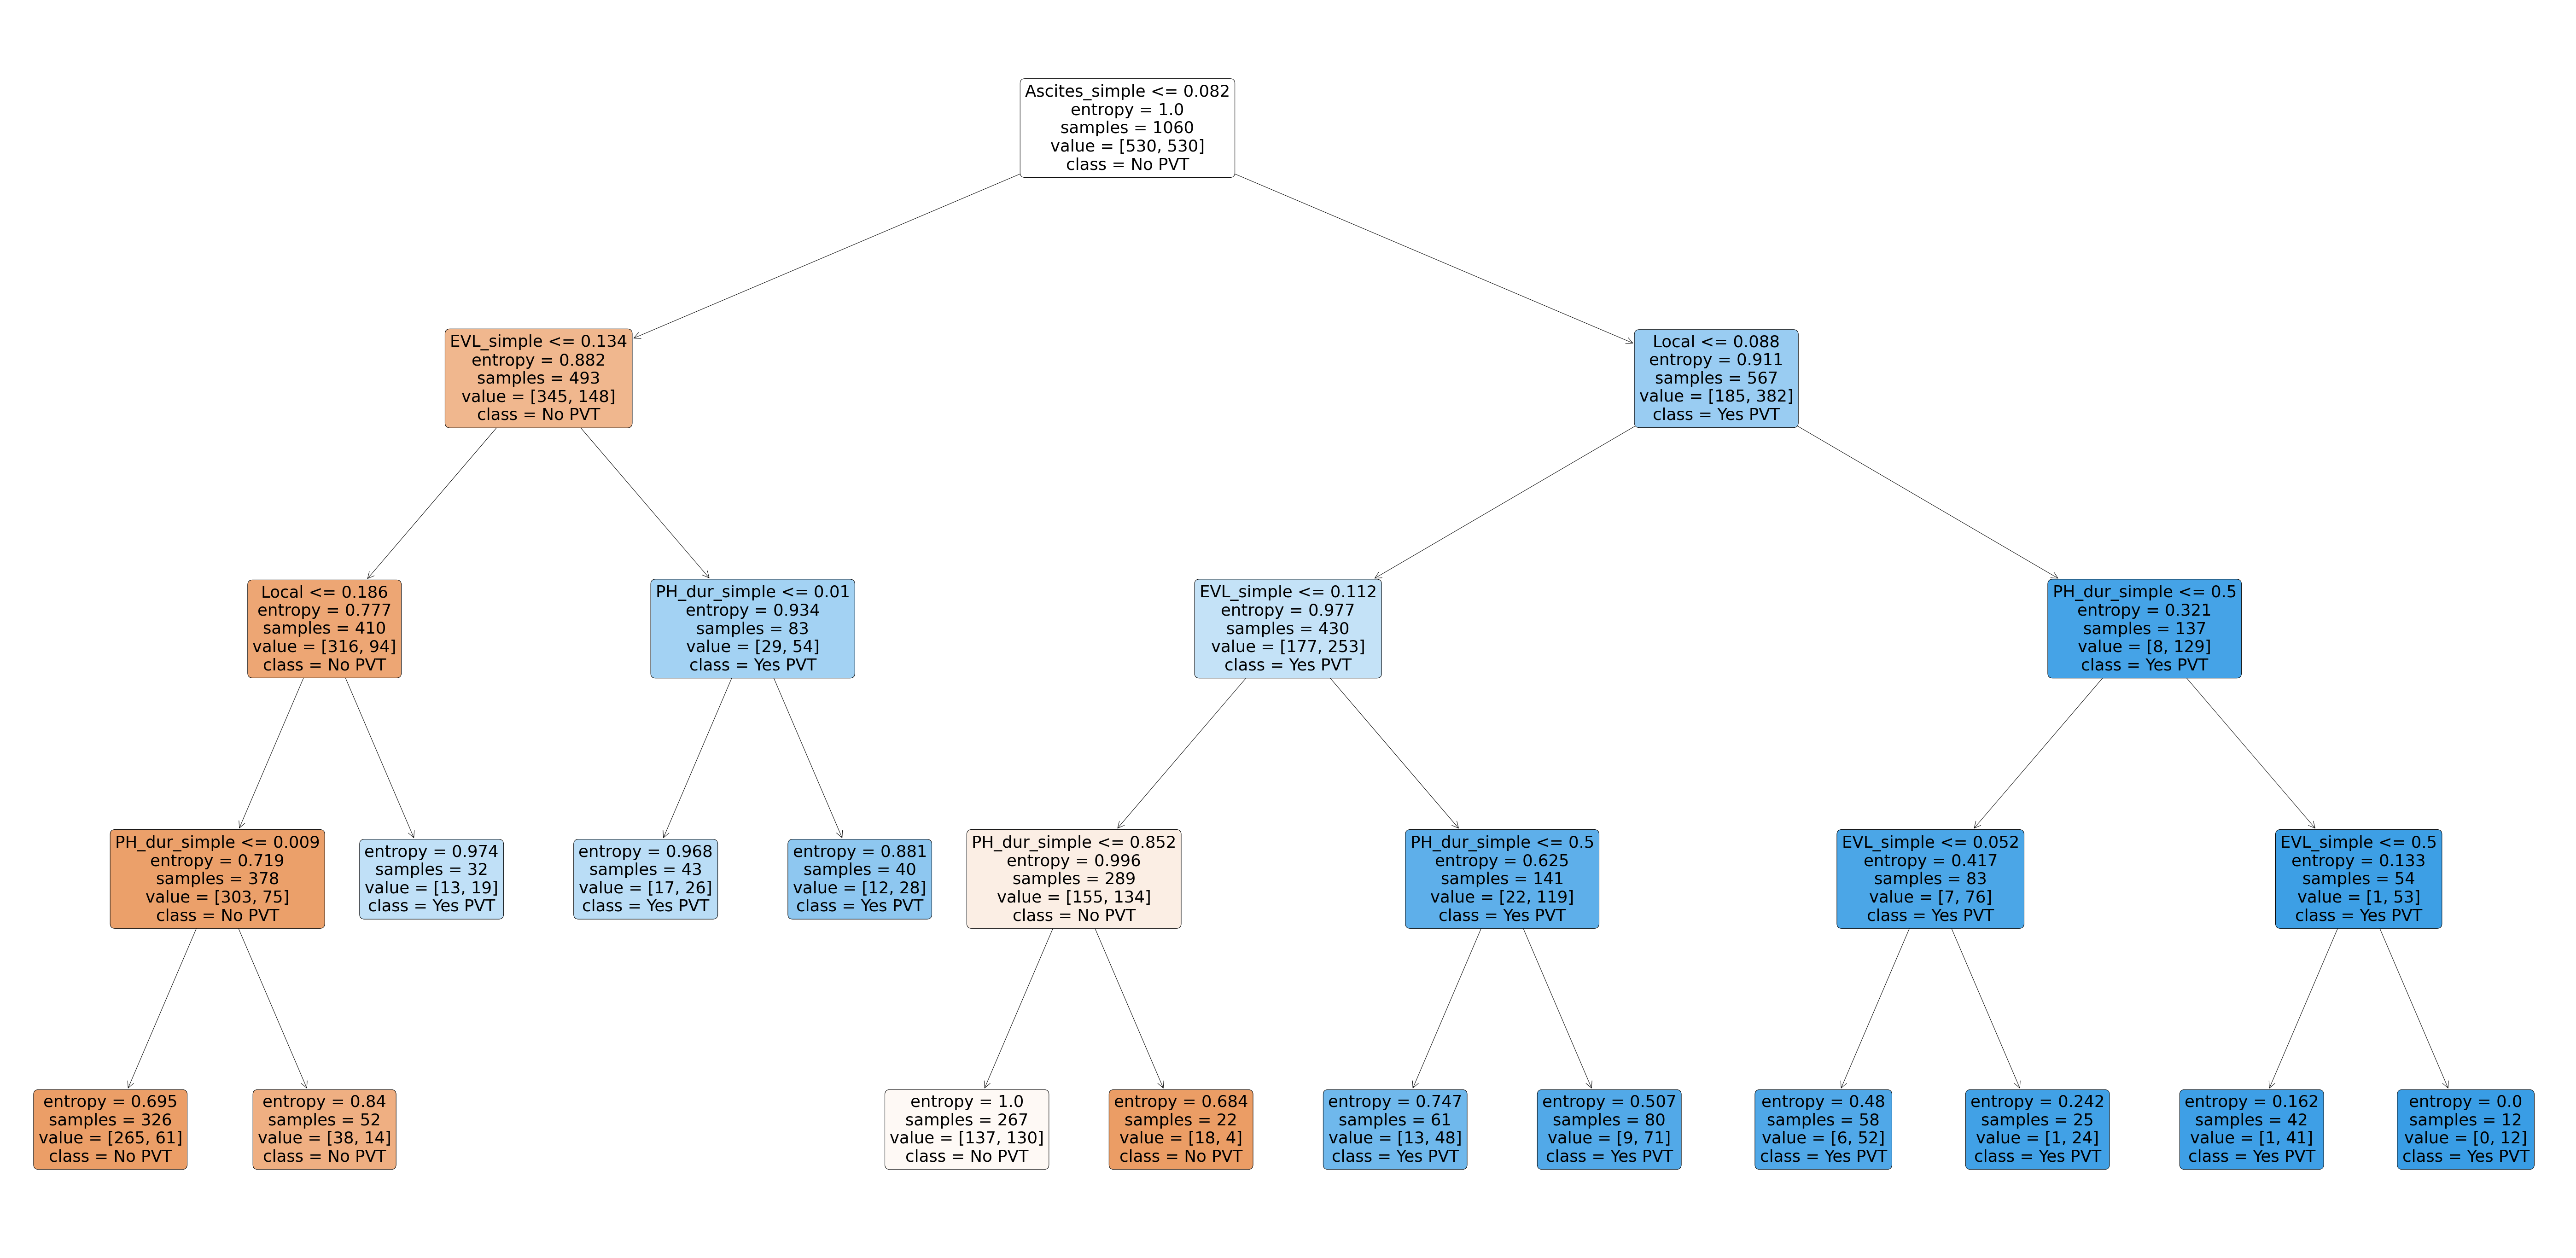

In [76]:
# отрисовываем финальное классификационное дерево
plt.figure(figsize=(100, 50))
plot_tree(df_dt_1,
          filled=True,
          rounded=True,
          class_names=["No PVT", "Yes PVT"],
          feature_names=X.columns);